In [98]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load 
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, clinical_data, on="Mouse ID")

#rename columns for ease of use in syntax
combined_data = combined_data.rename(columns={"Tumor Volume (mm3)": "tumor_volume",
                                             "Metastatic Sites": "metastatic_sites",
                                             "Mouse ID": "id"})
# Display the data table for preview
combined_data


,id,Drug,Timepoint,tumor_volume,metastatic_sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [99]:
# Mean Tumor Volume Data Grouped by Drug and Timepoint

#array of drug names and time points to use in for loops
drug_names = combined_data["Drug"].unique()
time_point = combined_data["Timepoint"].unique()
y = len(drug_names)
z = len(time_point)

#create series / list for storing list of drug names and list of means by timepoint
times = pd.Series() #series to append our means for each drug

#list comprehension to create list with right number and order of drug names
therapy = [n for n in drug_names for x in range(10)]

#for loop to give us series with time points and means
for x in range(y):
    treatment = drug_names[x]
    step1 = combined_data.loc[combined_data["Drug"]==treatment, :]
    step2 = step1.groupby("Timepoint").tumor_volume.mean()
    times = times.append(step2)
 
#Convert to Dataframe
times = pd.DataFrame(times).reset_index()
timepoint = times["index"]
mean_tumor = times[0]

tx_mean_effect = pd.DataFrame({"Drug": therapy, "Timepoint": timepoint, 
                              "Mean Tumor Size": mean_tumor})

# Preview DataFrame
tx_mean_effect

,Drug,Timepoint,Mean Tumor Size
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.527452
2,Stelasyn,10,49.463844
3,Stelasyn,15,51.529409
4,Stelasyn,20,54.067395
5,Stelasyn,25,56.166123
6,Stelasyn,30,59.826738
7,Stelasyn,35,62.440699
8,Stelasyn,40,65.356386
9,Stelasyn,45,68.438310


In [100]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#reuse list created by earlier list comprehension for drug names
therapy

#create list to hold standard errors
errors = pd.Series()

#for loop to give us series with time points and standard errors
for x in range(y):
    treat = drug_names[x]
    group1 = combined_data.loc[combined_data["Drug"]==treat, :]
    group2 = group1.groupby("Timepoint").tumor_volume.sem()
    errors = errors.append(group2)

# Convert to DataFrame
errors = pd.DataFrame(errors).reset_index()
timepoint = errors["index"]
sem_tumor = errors[0]

tx_sem_effect = pd.DataFrame({"Drug": therapy, "Timepoint": timepoint, 
                              "Standard Error": sem_tumor})

tx_sem_effect
# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Standard Error
0,Stelasyn,0,0.000000
1,Stelasyn,5,0.239862
2,Stelasyn,10,0.433678
3,Stelasyn,15,0.493261
4,Stelasyn,20,0.621889
5,Stelasyn,25,0.741922
6,Stelasyn,30,0.899548
7,Stelasyn,35,1.003186
8,Stelasyn,40,1.410435
9,Stelasyn,45,1.576556


In [101]:
# Minor Data Munging to Re-Format the Data Frames
#start with means
tx_mean = tx_mean_effect.pivot(index = "Timepoint", columns = "Drug", values = "Mean Tumor Size")

#preview that reformatting worked
tx_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [102]:
# Minor Data Munging to Re-Format the Data Frames
#next do standard errors
tx_sem = tx_sem_effect.pivot(index = "Timepoint", columns = "Drug", values = "Standard Error")

# Preview that Reformatting worked
tx_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


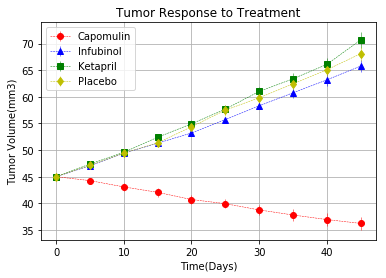

In [103]:
# Generate the Plot (with Error Bars)
x_axis = timepoint.unique()

#plot Capomulin
cap = tx_mean["Capomulin"].values
cap_sem = tx_sem["Capomulin"].values
plt.errorbar(x_axis, cap, yerr=cap_sem, marker="o", color = "r", label="Capomulin", ls="--", lw=0.5)

#plot Infubinol
inf = tx_mean["Infubinol"].values
inf_sem = tx_sem["Infubinol"].values
plt.errorbar(x_axis, inf, yerr=inf_sem, marker="^", color = "b", label="Infubinol", ls="--", lw=0.5)

#plot Ketapril
ket = tx_mean["Ketapril"].values
ket_sem = tx_sem["Ketapril"].values
plt.errorbar(x_axis, ket, yerr=ket_sem, marker="s", color = "g", label="Ketapril", ls="--", lw=0.5)

#plot Placebo
placebo = tx_mean["Placebo"].values
placebo_sem = tx_sem["Placebo"].values
plt.errorbar(x_axis, placebo, yerr=placebo_sem, marker="d", color = "y", label="Placebo", ls="--", lw=0.5)

#formatting title, axes labels, and legend
plt.grid()
plt.title("Tumor Response to Treatment", loc="center")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.legend()
# Save the Figure
plt.savefig('tumor_response.png')


In [104]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [105]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#reuse list created earlier for drug names
therapy 

#create list to Mean Met Site data
mean_mets = pd.Series()

#for loop to give us series with time points and standard errors
for x in range(y):
    treat = drug_names[x]
    group1 = combined_data.loc[combined_data["Drug"]==treat, :]
    group2 = group1.groupby("Timepoint").metastatic_sites.mean()
    mean_mets = mean_mets.append(group2)

# Convert to DataFrame
mean_mets = pd.DataFrame(mean_mets).reset_index()
timepoint = mean_mets["index"]
mean_mets = mean_mets[0]

tx_mets_effect = pd.DataFrame({"Drug": therapy, "Timepoint": timepoint, 
                              "Mean Metastatic Sites": mean_mets})
# Preview DataFrame
tx_mets_effect

,Drug,Timepoint,Mean Metastatic Sites
0,Stelasyn,0,0.000000
1,Stelasyn,5,0.240000
2,Stelasyn,10,0.478261
3,Stelasyn,15,0.782609
4,Stelasyn,20,0.952381
5,Stelasyn,25,1.157895
6,Stelasyn,30,1.388889
7,Stelasyn,35,1.562500
8,Stelasyn,40,1.583333
9,Stelasyn,45,1.727273


In [106]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#reuse list created earlier for drug names
therapy 

#create list to Mean Met Site data
mets_sem = pd.Series()

#for loop to give us series with time points and standard errors
for x in range(y):
    treat = drug_names[x]
    group1 = combined_data.loc[combined_data["Drug"]==treat, :]
    group2 = group1.groupby("Timepoint").metastatic_sites.sem()
    mets_sem = mets_sem.append(group2)
    
# Convert to DataFrame
mets_sem = pd.DataFrame(mets_sem).reset_index()
timepoint = mets_sem["index"]
sem_mets = mets_sem[0]

tx_mets_sem = pd.DataFrame({"Drug": therapy, "Timepoint": timepoint, 
                              "Std Error": sem_mets})

# Preview DataFrame
tx_mets_sem

,Drug,Timepoint,Std Error
0,Stelasyn,0,0.000000
1,Stelasyn,5,0.087178
2,Stelasyn,10,0.123672
3,Stelasyn,15,0.153439
4,Stelasyn,20,0.200905
5,Stelasyn,25,0.219824
6,Stelasyn,30,0.230641
7,Stelasyn,35,0.240983
8,Stelasyn,40,0.312815
9,Stelasyn,45,0.359062


In [107]:
# Minor Data Munging to Re-Format the Data Frames
#start with mean metastatic sites
tx_mets = tx_mets_effect.pivot(index = "Timepoint", columns = "Drug", values = "Mean Metastatic Sites")

# Preview that Reformatting worked
tx_mets

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [108]:
# Minor Data Munging to Re-Format the Data Frames
#now for SEM
mets_error = tx_mets_sem.pivot(index = "Timepoint", columns = "Drug", values = "Std Error")

# Preview that Reformatting worked
mets_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


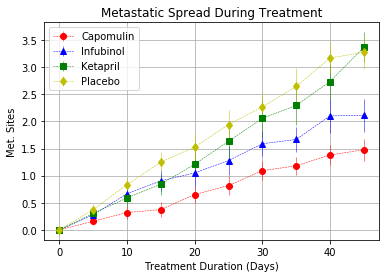

In [109]:
# Generate the Plot (with Error Bars)
x_axis = timepoint.unique()

#plot Capomulin
cap = tx_mets["Capomulin"].values
cap_sem = mets_error["Capomulin"].values
plt.errorbar(x_axis, cap, yerr=cap_sem, marker="o", color = "r", label="Capomulin", ls="--", lw=0.5)

#plot Infubinol
inf = tx_mets["Infubinol"].values
inf_sem = mets_error["Infubinol"].values
plt.errorbar(x_axis, inf, yerr=inf_sem, marker="^", color = "b", label="Infubinol", ls="--", lw=0.5)

#plot Ketapril
ket = tx_mets["Ketapril"].values
ket_sem = mets_error["Ketapril"].values
plt.errorbar(x_axis, ket, yerr=ket_sem, marker="s", color = "g", label="Ketapril", ls="--", lw=0.5)

#plot Placebo
placebo = tx_mets["Placebo"].values
placebo_sem = mets_error["Placebo"].values
plt.errorbar(x_axis, placebo, yerr=placebo_sem, marker="d", color = "y", label="Placebo", ls="--", lw=0.5)

#formatting title, axes labels, and legend
plt.grid()
plt.title("Metastatic Spread During Treatment", loc="center")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend()

# Save the Figure
plt.savefig('metastatic_spread.png')

# Show the Figure
plt.show()

## Survival Rates

In [110]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#reuse list created earlier for drug names
therapy 

#create list to store number of surviving mice
survivors = pd.Series()

#for loop to give us series with time points and standard errors
for x in range(y):
    treat = drug_names[x]
    group1 = combined_data.loc[combined_data["Drug"]==treat, :]
    group2 = group1.groupby("Timepoint")["id"].nunique()
    survivors = survivors.append(group2)

# Convert to DataFrame
survivors = pd.DataFrame(survivors).reset_index()
timepoint = survivors["index"]
mice_survive = survivors[0]
survival_analyze = pd.DataFrame({"Drug": therapy, "Timepoint": timepoint, 
                              "Surviving Mice": mice_survive})

# Preview DataFrame
survival_analyze

,Drug,Timepoint,Surviving Mice
0,Stelasyn,0,25
1,Stelasyn,5,24
2,Stelasyn,10,22
3,Stelasyn,15,22
4,Stelasyn,20,20
5,Stelasyn,25,19
6,Stelasyn,30,18
7,Stelasyn,35,16
8,Stelasyn,40,12
9,Stelasyn,45,11


In [111]:
# Minor Data Munging to Re-Format the Data Frames
survival_stats = survival_analyze.pivot(index = "Timepoint", columns = "Drug", values = "Surviving Mice")
# Preview the Data Frame
survival_stats

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [112]:
#convert dataframe to percentages
cols = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
       "Ramicane", "Stelasyn", "Zoniferol"]
percent_survival = survival_stats[cols].div(25)*100
percent_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


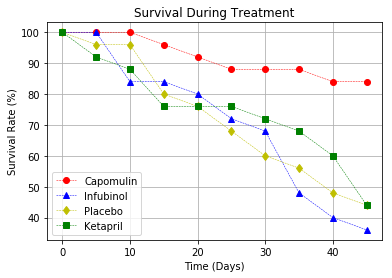

In [113]:
# Generate the Plot (Accounting for percentages)
x_axis = timepoint.unique()

#plot Capomulin
cap = percent_survival["Capomulin"].values
plt.plot(x_axis, cap, marker="o", color = "r", label="Capomulin", ls="--", lw=0.5)

#plot Infubinol
inf = percent_survival["Infubinol"].values
plt.plot(x_axis, inf, marker="^", color = "b", label="Infubinol", ls="--", lw=0.5)

#plot Ketapril
ket = percent_survival["Ketapril"].values
plt.errorbar(x_axis, ket, marker="s", color = "g", label="Ketapril", ls="--", lw=0.5)

#plot Placebo
placebo = percent_survival["Placebo"].values
plt.plot(x_axis, placebo, marker="d", color = "y", label="Placebo", ls="--", lw=0.5)

#formatting title, axes labels, and legend
plt.grid()
plt.title("Survival During Treatment", loc="center")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()
# Save the Figure
plt.savefig('survival.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [114]:
# Calculate the percent changes for each drug
#use tx_mean df from earlier that looked at mean tumor size by drug
#use columns variable to specify columns we want
columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

tumor_change = pd.DataFrame()
tumor_change = 100*(tx_mean[columns].iloc[-1]/tx_mean[columns].iloc[0]-1)
# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

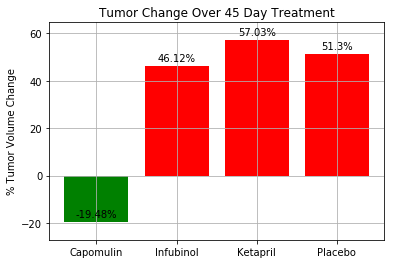

In [117]:
# zip into dataframe
tumor_tumor = pd.DataFrame({"Drug": columns, "Change": tumor_change, "quality":value_type})
tumor_tumor

#store x axis labels
d = tumor_tumor["Drug"]
#store y axis values and round to 2 decimals
c = round(tumor_tumor["Change"], 2)

#set variable for marks on x axis
x = np.arange(len(d))

# Plot. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
rects = ax.bar(d, c, color=(c > 0).map({True: 'r', False:'g'}))
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(x)
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height), xy=(rect.get_x() + rect.get_width()/2, height), 
                    xytext = (0,3), textcoords = "offset points", ha='center', va='bottom')

# Call functions to implement
autolabel(rects)
ax.margins(y=0.1)


# Save the Figure
plt.savefig('percent_tumor_change.png')

# Show the Figure
fig.show()